# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',120)
df = pd.read_excel('candyhierarchy2017.xlsx')
df

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN

<a id='wrangling'></a>
## Data Wrangling



### General Properties<a id='wrangling'></a>

# 2- show some general properties for the data 

In [2]:
df.shape

(2460, 120)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [4]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [5]:
df.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [6]:
df.isna().sum()

Internal ID                                                                                  0
Q1: GOING OUT?                                                                             110
Q2: GENDER                                                                                  41
Q3: AGE                                                                                     84
Q4: COUNTRY                                                                                 64
Q5: STATE, PROVINCE, COUNTY, ETC                                                           100
Q6 | 100 Grand Bar                                                                         747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Q6 | Any full-sized candy bar                                                              672
Q6 | Black Jacks                                                                           958
Q6 | Bonkers (the candy)                          

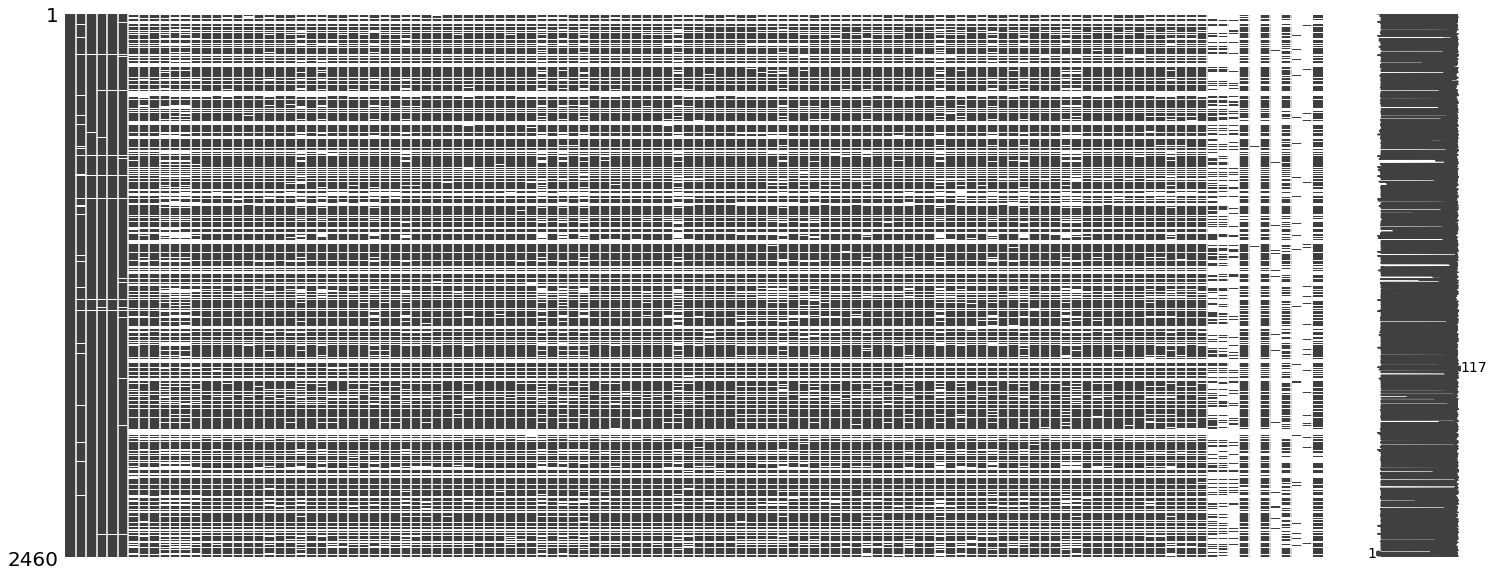

In [7]:
msno.matrix(df)
plt.show()

# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

### There are a lot of missing values in almost all columns, no duplicates , columns Q4 , Q5 are filles with types



# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [8]:
df.dropna(thresh = 1500,axis  = 1, inplace = True)
df.drop(['Internal ID', 'Click Coordinates (x, y)'],axis = 1,inplace = True)
df.shape
df.drop_duplicates(inplace = True)

### 5 - clean `going out` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [9]:
df.columns

Index(['Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks', 'Q6 | Bottle Caps',
       ...
       'Q6 | Trail Mix', 'Q6 | Twix',
       'Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Q6 | Vicodin', 'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties',
       'Q10: DRESS', 'Q11: DAY'],
      dtype='object', length=104)

In [10]:
df.rename(columns = { 'Q1: GOING OUT?' : 'going_out', 'Q2: GENDER':'gender', 'Q3: AGE' : 'age', 'Q4: COUNTRY' : 'country', 'Q5: STATE, PROVINCE, COUNTY, ETC' : 'area', 'Q10: DRESS' : 'dress','Q11: DAY' : 'day'},inplace = True)
df.columns = df.columns.str.strip('Q6 | ')
df.columns

Index(['going_out', 'gender', 'age', 'country', 'area', '100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bottle Caps',
       ...
       'Trail Mix', 'Twix',
       'Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Vicodin', 'Whatchamacallit Bars', 'White Bread',
       'Whole Wheat anything', 'York Peppermint Patties', 'dress', 'day'],
      dtype='object', length=104)

In [11]:
df['going_out'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [12]:
df['going_out'].fillna('No',inplace = True) 

In [13]:
df['going_out'].unique()

array(['No', 'Yes'], dtype=object)

### 6 - clean ` gender` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [14]:
df['gender'].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [15]:
df['gender'].fillna('I\'d rather not say',inplace = True)
df['gender'].replace('Other','I\'d rather not say',inplace = True)

In [16]:
df['gender'].unique()

array(["I'd rather not say", 'Male', 'Female'], dtype=object)

### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [17]:
df['age'].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [18]:
filt = (df['age'] == '46 Halloweens.')
df.loc[filt,'age'] = 46

In [19]:
filt = (df['age'] == 'sixty-nine')
df.loc[filt,'age'] = 69

In [20]:
filt = (df['age'] == '59 on the day after Halloween')
df.loc[filt,'age'] = 59

In [21]:
filt = (df['age'] == '60+')
df.loc[filt,'age'] = 61

In [22]:
filt = (df['age'] == 'Over 50')
df.loc[filt,'age'] = 51

In [23]:
notDigit = ~df['age'].astype(str).apply(lambda x: x.replace('.','',1).isdigit())
df.loc[notDigit,'age'].unique()

array([nan, 'Old enough', 'Many', '?', 'no', '45-55', 'hahahahaha',
       'older than dirt', '5u', 'Enough', 'See question 2', '24-50',
       'ancient', 'OLD', 'old', 'MY NAME JEFF', 'old enough', 'your mom',
       'I can remember when Java was a cool new language'], dtype=object)

In [24]:
df.loc[notDigit,'age'] = np.nan

In [25]:
df.loc[(df['age'] > 100 ),'age'] = 100
df.loc[(df['age'] < 6 ),'age'] = 6

In [26]:
df['age'].mode()

0    40
dtype: object

In [27]:
df['age'].fillna(40,inplace = True)

In [28]:
df['age'] = df['age'].astype('int')
df['age'].unique()

array([ 40,  44,  49,  23,  53,  33,  43,  56,  64,  37,  59,  48,  54,
        36,  45,  25,  34,  35,  38,  58,  50,  47,  16,  52,  63,  65,
        41,  27,  31,  61,  46,  42,  62,  29,  39,  32,  28,  69,  67,
        30,  22,  26,  51,  70,  24,  18,  19,  57,  60,  66,  12,  55,
        72,  21,  11,   9,  68,  20,   6,  10,  71,  90,  13, 100,  99,
         7,  88,  74,  17,  15,   8,  75,  14,  76,  77,  73], dtype=int64)

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [29]:
df['country'].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [30]:
df['country'].value_counts().sort_values(ascending = False)

USA                               696
United States                     496
usa                               215
Canada                            179
Usa                               139
US                                126
USA                                73
United States of America           57
us                                 40
united states                      38
United States                      37
canada                             34
United states                      19
Us                                 16
United Kingdom                     13
UK                                 13
United States of America           11
Canada                              8
U.S.                                8
U.S.A.                              7
Germany                             7
Netherlands                         6
Australia                           5
united states of america            5
Japan                               5
US of A                             4
Mexico      

In [31]:
from thefuzz import process
from thefuzz import fuzz

In [32]:
print(fuzz.WRatio('USA','United States of America'))
print(fuzz.WRatio('USA','America'))
print(fuzz.WRatio('America','United States of America'))
print(fuzz.WRatio('USA','America'))
print(fuzz.WRatio('UK','United Kindom'))

57
30
90
30
45


In [33]:
countries = ['Hong King','Costa Rica','Greece','Netherlands','Alaska','England','USA','Switzerland','China','Denmark', 'United States of America', 'Spain', 'Australia' , 'UK' , 'United Kindom' , 'Canada' , 'Japan' , 'Sweden' , 'France' , 'Taiwan' , 'Scotland' ,'Atlantis', 'Germany','Indonesia','South Africa', 'Ireland' , 'Iceland' ,'Finland', 'Mexico' ,'Singapore','South Korea','UAE']

In [34]:
for country in countries:
    for i in process.extract(country, df['country'].unique(), limit = len(df['country'].unique())):
        if i[1] > 80 :
            filt = df['country'] == i[0]
            df.loc[filt,'country'] = country

In [35]:
df['country'].replace({'U.S.A.' : 'USA' , 'u s a' : 'USA' , 'UK' : 'United Kindom' , 'United States of America' : 'USA','England' : 'United Kindom'} , inplace = True)

In [36]:
df.loc[~df['country'].isin(countries),'country'] = np.nan
df['country'].fillna('Unknown',inplace = True)

In [37]:
df['country'].value_counts()

USA              1321
United Kindom     744
Canada            226
Unknown            63
Germany            10
Netherlands         7
Australia           7
Japan               5
Iceland             5
Scotland            5
Mexico              4
Switzerland         3
France              3
Sweden              2
Hong King           2
Denmark             2
South Korea         2
Alaska              2
China               2
Spain               1
South Africa        1
Costa Rica          1
Singapore           1
Finland             1
Greece              1
Taiwan              1
UAE                 1
Indonesia           1
Atlantis            1
Name: country, dtype: int64

### 9 - clean ` area` column
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [38]:
df['area'].unique()

array([nan, 'NM', 'Virginia', 'or', 'exton pa', 'Colorado ', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Colorado', 'Los Angeles, California', 'CA',
       'New York ', 'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota ',
       'London', 'mn', 'TEXAS', 'Illinois', 'District of Columbia',
       'Washington', 'Massachusetts ', 'OR', 'Montana', 'New York',
       'massachusetts', 'Abu Dhabi', 'TX', 'Arizona', 'Dc', 'yukon',
       'Pennsylvania ', 'MD', 'Ohio', 'Alberta ', 'OXFORDSHIRE', 'DC',
       'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'alaska',
       'Ny', 'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'CDMX', 'north carolina', 'Tennessee ', 'Texas ',
       'Knox cou

In [39]:
df.drop('area',axis = 1,inplace = True)

### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [40]:
for i in range(4,101) :
    print(df.iloc[:,i].unique())
    print(df.iloc[:,i].mode()[0])
    df.iloc[:,i].fillna(df.iloc[:,i].mode()[0],inplace = True)

[nan 'MEH' 'JOY' 'DESPAIR']
JOY
[nan 'DESPAIR' 'MEH' 'JOY']
DESPAIR
[nan 'JOY' 'MEH' 'DESPAIR']
JOY
[nan 'MEH' 'DESPAIR' 'JOY']
DESPAIR
[nan 'DESPAIR' 'MEH' 'JOY']
MEH
[nan 'DESPAIR' 'MEH' 'JOY']
DESPAIR
[nan 'DESPAIR' 'JOY' 'MEH']
DESPAIR
[nan 'DESPAIR' 'MEH' 'JOY']
JOY
[nan 'MEH' 'DESPAIR' 'JOY']
JOY
[nan 'MEH' 'DESPAIR' 'JOY']
DESPAIR
[nan 'DESPAIR' 'MEH' 'JOY']
DESPAIR
[nan 'MEH' 'JOY' 'DESPAIR']
JOY
[nan 'JOY' 'MEH' 'DESPAIR']
JOY
[nan 'MEH' 'JOY' 'DESPAIR']
JOY
[nan 'DESPAIR' 'JOY' 'MEH']
DESPAIR
[nan 'DESPAIR' 'MEH' 'JOY']
DESPAIR
[nan 'DESPAIR' 'MEH' 'JOY']
MEH
[nan 'DESPAIR' 'JOY' 'MEH']
DESPAIR
[nan 'DESPAIR' 'MEH' 'JOY']
DESPAIR
[nan 'MEH' 'JOY' 'DESPAIR']
DESPAIR
[nan 'JOY' 'MEH' 'DESPAIR']
JOY
[nan 'DESPAIR' 'MEH' 'JOY']
DESPAIR
[nan 'DESPAIR' 'MEH' 'JOY']
DESPAIR
[nan 'DESPAIR' 'JOY' 'MEH']
MEH
[nan 'DESPAIR' 'JOY' 'MEH']
MEH
[nan 'MEH' 'DESPAIR' 'JOY']
DESPAIR
[nan 'DESPAIR' 'MEH' 'JOY']
DESPAIR
[nan 'MEH' 'JOY' 'DESPAIR']
JOY
[nan 'MEH' 'DESPAIR' 'JOY']
MEH
[nan 'DESPAI

In [41]:
for i in range(4,101) :
    print(df.iloc[:,i].unique())
    print(df.iloc[:,i].mode()[0])

['JOY' 'MEH' 'DESPAIR']
JOY
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['JOY' 'MEH' 'DESPAIR']
JOY
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['MEH' 'DESPAIR' 'JOY']
MEH
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['DESPAIR' 'JOY' 'MEH']
DESPAIR
['JOY' 'DESPAIR' 'MEH']
JOY
['JOY' 'MEH' 'DESPAIR']
JOY
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['JOY' 'MEH' 'DESPAIR']
JOY
['JOY' 'MEH' 'DESPAIR']
JOY
['JOY' 'MEH' 'DESPAIR']
JOY
['DESPAIR' 'JOY' 'MEH']
DESPAIR
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['MEH' 'DESPAIR' 'JOY']
MEH
['DESPAIR' 'JOY' 'MEH']
DESPAIR
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['JOY' 'MEH' 'DESPAIR']
JOY
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['MEH' 'DESPAIR' 'JOY']
MEH
['MEH' 'DESPAIR' 'JOY']
MEH
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['JOY' 'MEH' 'DESPAIR']
JOY
['MEH' 'DESPAIR' 'JOY']
MEH
['DESPAIR' 'MEH' 'JOY']
DESPAIR
['JOY' 'MEH' 'DESPAIR']
JOY
['JOY' 'MEH' 'DESPAIR']
JOY
['JOY' 'MEH' 'DESPAIR']
JOY
['JOY' 'MEH'

### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [42]:
df['dress'].unique()

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [43]:
df['dress'].fillna(df['dress'].mode()[0],inplace = True)

### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [44]:
df['day'].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [45]:
df['day'].fillna(df['day'].mode()[0],inplace = True)

### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

In [46]:
df.astype({'age' : 'int','going_out':'category', 'gender':'category', 'country':'category', 'dress':'category', 'day':'category'}, inplace = True)

,going_out,gender,age,country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,dress,day
0,No,I'd rather not say,40,Unknown,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday
1,No,Male,44,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
2,No,Male,49,USA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday
3,No,Male,40,USA,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAI

In [47]:
df.isna().sum()

going_out                                                                            0
gender                                                                               0
age                                                                                  0
country                                                                              0
100 Grand Bar                                                                        0
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    0
Any full-sized candy bar                                                             0
Black Jacks                                                                          0
Bottle Caps                                                                          0
Box'o'Raisins                                                                        0
Broken glow stick                                                                    0
Butterfinger                               

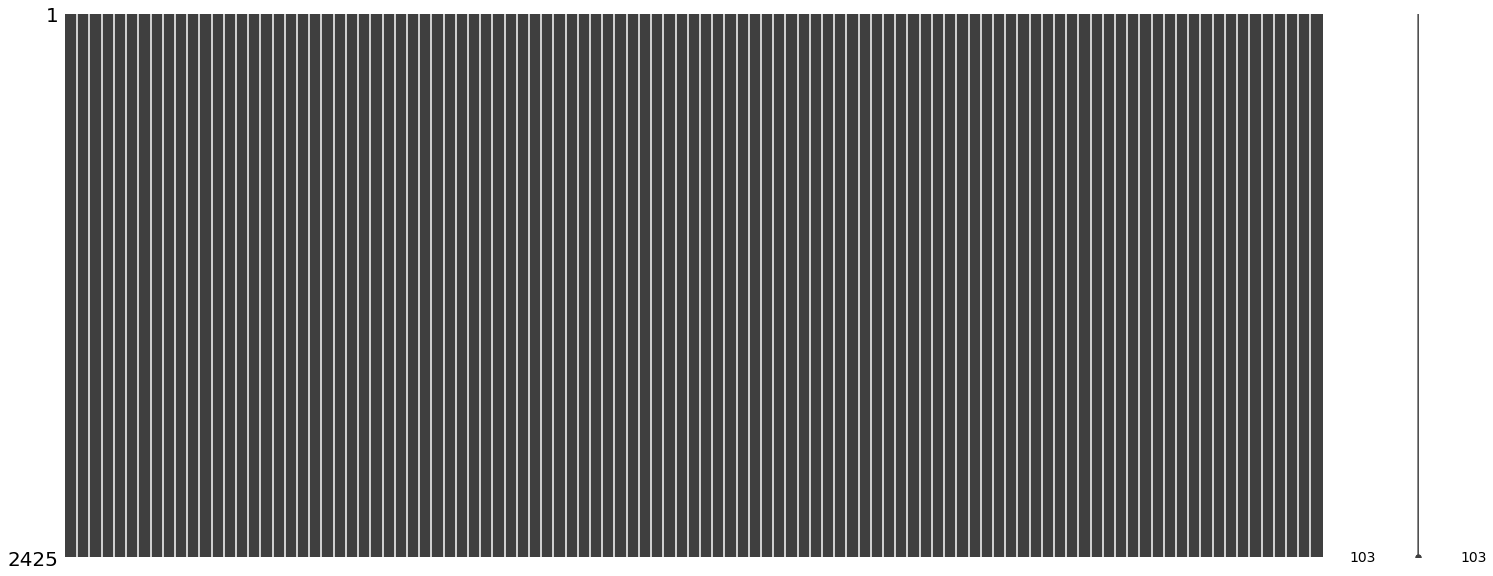

In [48]:
msno.matrix(df)
plt.show()

In [49]:
df.sample(15)

,going_out,gender,age,country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,dress,day
1987,No,Male,43,United Kindom,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,MEH,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,JOY,JOY,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,JOY,DESPAIR,DESPAIR,MEH,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,JOY,White and gold,Sunday
2389,No,Female,57,USA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday
1877,No,I'd rather not say,49,Canada,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,MEH,JOY,MEH,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,JOY,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday
752,No,Male,21,United Kindom,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,JOY,MEH,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,MEH,JOY,DESPAI

In [50]:
df.to_csv('Cleaned Candy.csv')

### 14 - write a summary about all the cleaning steps 

#### droped useless columns and columns with too many missing values
#### renamed columns
#### looked at each column's unique values
#### searched for outliers , wrong values , typos , missing values
#### filled wrong/missing values with 'Unkown' / mode, filled outliers with min, max
##### while cleaning 'age'  column I found that some people have wrote their age as text, I had to correct that manually as I didn't want to drop them
#### replaced typos with correct values using string comparison with thefuzz package
##### I had to write the correct countries' name manually
#### converted data types